In [54]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
import datetime
from tqdm import tqdm
from matplotlib.patches import Polygon
%matplotlib inline


In [4]:
jobAgeCount = pickle.load( open("jobage.p", "rb"))
clicks = pickle.load( open("clicks.p", "rb"))
hoc = pickle.load( open("hoc.p", "rb"))
category = pickle.load( open("category.p", "rb"))
count = 0
cats = ['STEM', 'Business','Little/No Education', 'Liberal Arts', 'Technical', 'uncategorized']

In [ ]:
count = 0
x = range(len(cats))
stem = []
buisness = []
lne = []
la = []
tech = []
uc = []
for d in tqdm(clicks.keys()):
 #   count = count + 1
    if jobAgeCount[d] != 0:
        plt.xticks(x, cats)
        plt.scatter(hoc[category[d]], clicks[d]/jobAgeCount[d])
       # print(hoc[category[d]])
        if hoc[category[d]] == "0":
            stem.append(clicks[d]/jobAgeCount[d])
        elif hoc[category[d]] == "1":
            buisness.append(clicks[d]/jobAgeCount[d])
        elif hoc[category[d]] == "2":
            lne.append(clicks[d]/jobAgeCount[d])
        elif hoc[category[d]] == "3":
            la.append(clicks[d]/jobAgeCount[d])
        elif hoc[category[d]] == "4":
            tech.append(clicks[d]/jobAgeCount[d])
        elif hoc[category[d]] == "5":
            uc.append(clicks[d]/jobAgeCount[d])
    #int(re.search(r'\d+', str(d)).group())
   # if count == 10000:
   #     print("reach 1k")
   #     break
   # if count%1000 == 0:
    #    print("reach " + str(count/1000) + "k")

 10%|█████▋                                                | 89595/858584 [1:43:38<14:49:30, 14.41it/s]

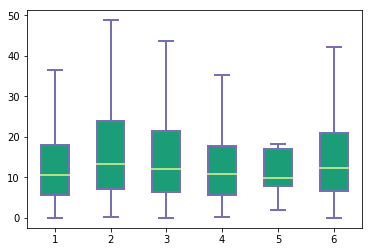

In [49]:
#print(stem)
np.array(stem).shape = (-1,1)
np.array(buisness).shape = (-1,1)
np.array(lne).shape = (-1,1)
np.array(la).shape = (-1,1)
np.array(tech).shape = (-1,1)
np.array(uc).shape = (-1,1)
#print(stem)
data = [stem, buisness, lne, la, tech, uc]
fig, ax = plt.subplots()
bp = ax.boxplot(data,0,'', patch_artist=True)
## add patch_artist=True option to ax.boxplot() 
## to get fill color
#bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
              
plt.show()